<font size='4'><b>Color Classification</b></font>

In this project we want to create an image classification machine learning for car colors. First, we will create the dataset for training and testing, next we create the neural network model for the classification, and analyse its performance, then we will test the model with different image samples, and last we will try and compare different neural network model.

We import the important modules for our data preparations. We use numpy for matrix and array operations, Matplotlib and cv2 for image manipulations and us will use OS for some file pathing interaction.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

<font size='3'><b>1. Data preparation</b></font>

In this section we will prepare our dataset to be appropriate for training a neural network. Our data are car images arranged by their color and placed in folders labeled by the color. There are 5 color class folders: White, red, green, blue and black. And each class contains 640 image samples (Exception: Green, 470 images). In total there are 3030 images.

The different class folders are placed inside DATADIR file "DATASET"

In [2]:
DATADIR = "DATASET"
CATEDIR = ["White","Red","Green","Blue","Black"]

In order to access the image inside a class, we use 2 'for' loops. The first loop gives access to the DATADIR, and each class folder CATEDIR. The second loop gives access to the images inside the class folders.
The image in itself is useless as a data, we use cv2.imread in order to transform the image into an array. And with matplotlib imshow we can have a display of the image.

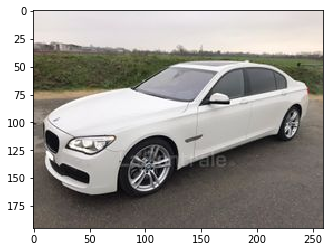

In [3]:
for class_folder in CATEDIR:
# access to the inside DATASET folder containing the different class folders
    path = DATADIR+"/"+class_folder
    for img in os.listdir(path):
    # access to the inside of each class folder, where the images samples are
        img_path = path+"/"+img
        # transform image into an array
        img_array = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show
        break
    break

The image as an array has 3 parameters: 2 parameters for the size, the weight and the height, and one parameter the number of color layers (in our case 3, referencing to RGB)

In [4]:
print("image shape: ", img_array.shape)

image shape:  (195, 260, 3)


In [5]:
print("image array: ", img_array)

image array:  [[[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [217 221 226]
  [217 221 226]
  [217 221 226]]

 [[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [217 221 226]
  [217 221 226]
  [217 221 226]]

 [[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [217 221 226]
  [217 221 226]
  [217 221 226]]

 ...

 [[ 84  93 103]
  [ 86  95 105]
  [ 84  93 103]
  ...
  [106 112 119]
  [ 97 102 111]
  [ 99 105 112]]

 [[ 88  97 107]
  [ 90  99 109]
  [ 87  96 106]
  ...
  [106 112 119]
  [ 95 101 108]
  [ 95 101 108]]

 [[ 87  96 106]
  [ 89  98 108]
  [ 86  95 105]
  ...
  [108 114 121]
  [ 95 101 108]
  [ 93  99 106]]]


In certain cases the images from our dataset can come with different size. In order to have a uniform dataset, we resize all the images using cv2.resize.

<function matplotlib.pyplot.show(*args, **kw)>

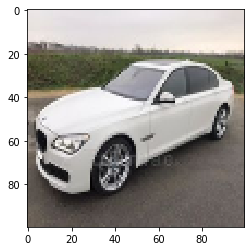

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show

The resized image retains all its features, and the image is still recognizable.
The shape of the new image array also retains the 3 parameters, with the size parameters changed.

In [7]:
print("new image shape: ", new_array.shape)

new image shape:  (100, 100, 3)


In [8]:
print("new image array: ", new_array)

new image array:  [[[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [216 219 227]
  [216 220 226]
  [217 221 226]]

 [[230 230 235]
  [230 230 235]
  [230 230 235]
  ...
  [215 218 227]
  [216 220 226]
  [217 220 225]]

 [[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  [215 218 226]
  [215 218 226]
  [216 219 227]]

 ...

 [[ 85  94 104]
  [ 84  93 103]
  [ 88  97 107]
  ...
  [102 105 113]
  [ 96 101 109]
  [102 108 119]]

 [[ 88  97 107]
  [ 88  97 107]
  [ 89  98 108]
  ...
  [ 97 100 109]
  [ 97 101 111]
  [ 98 103 113]]

 [[ 89  98 108]
  [ 86  95 105]
  [ 88  97 107]
  ...
  [ 94  96 106]
  [ 96 100 108]
  [ 95 101 108]]]


<font size='3'><b>2. Creating the training data</b></font>

With the above operation, we can create the training data for the neural network.

In [9]:
training_data = []
IMG_SIZE = 100

def create_training_data():
    for class_folder in CATEDIR:
        path = DATADIR+"/"+class_folder
        # give an index to each class folder
        class_index = CATEDIR.index(class_folder)
        for img in os.listdir(path):
            img_array = cv2.imread(path+"/"+img)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
            training_data.append([new_array, class_index])
create_training_data()

We can observe the length of training_data corresponding to the total number of image samples.

In [10]:
print("number of image samples: ", len(training_data))

number of image samples:  3038


We can also observe some data sample from our training_data.

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [12]:
# separating the images from the classes inside training_data
X = []
y = []

for images, classes in training_data:
    X.append(images)
    y.append(classes)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

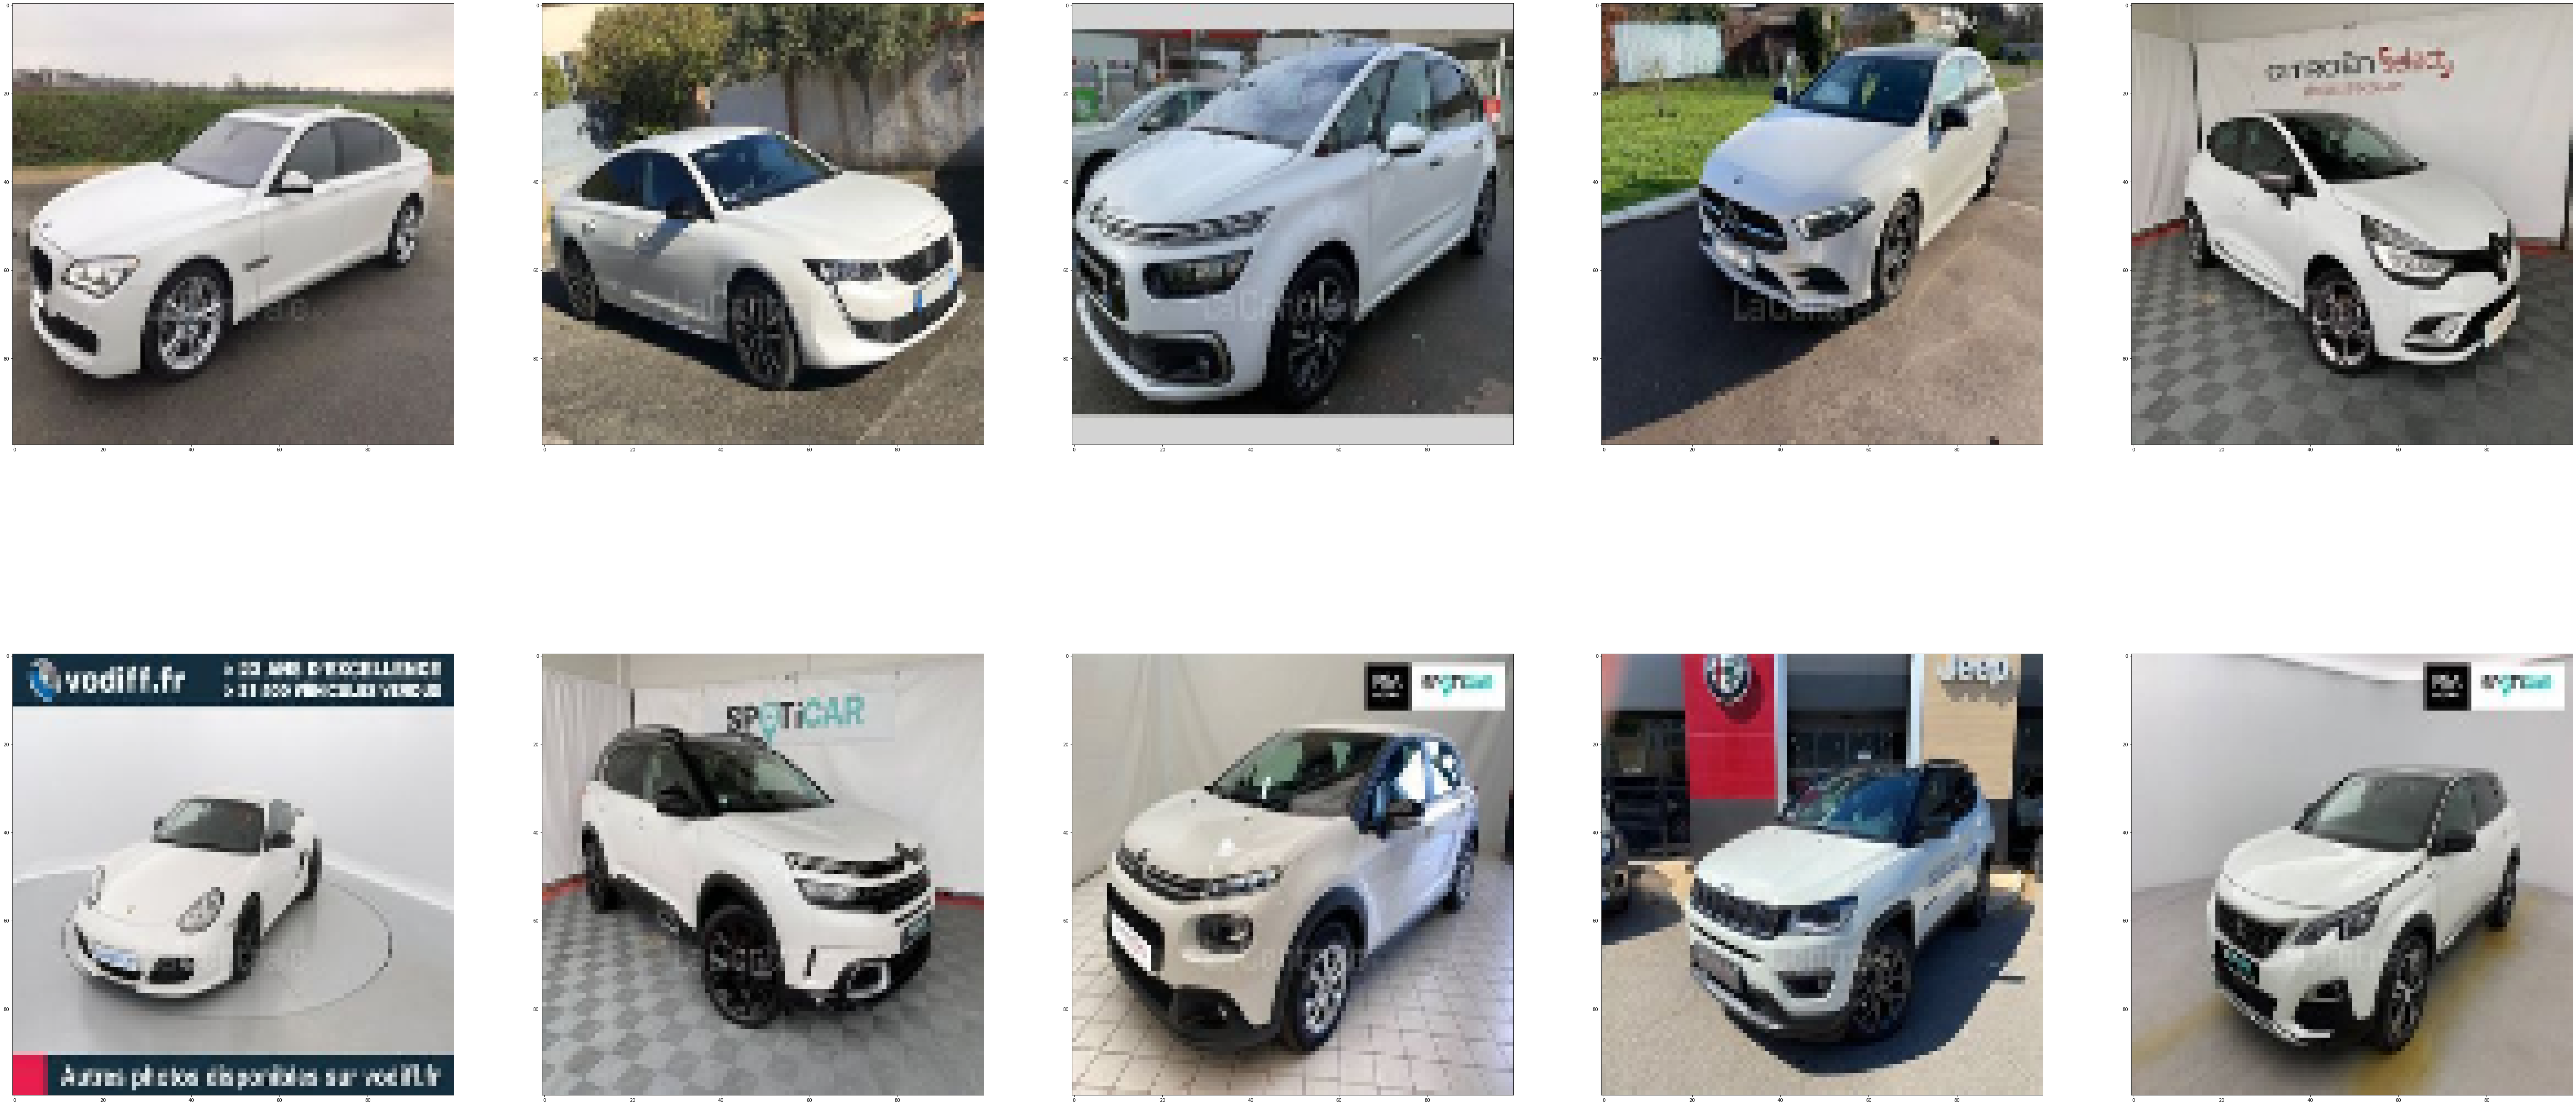

In [13]:
# displaying the first 10 image samples of our training data
fig = plt.figure(figsize=(IMG_SIZE, IMG_SIZE))

for i,img in enumerate(X[:10]):
    fig.add_subplot(4,5, i+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
plt.show()

Because of the 'for' loop, our image samples are ordered and not randomized. This can result in poor performance in the training process. For a more efficient training, we will shuffle our image samples inside training_data randomly, by importing the module random.

In [14]:
import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

3
0
1
0
1
2
1
3
4
2


In [15]:
# separating the images from the classes inside training_data
X = []
y = []

for images, classes in training_data:
    X.append(images)
    y.append(classes)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

We can see that the image samples order is randomized inside training_data.

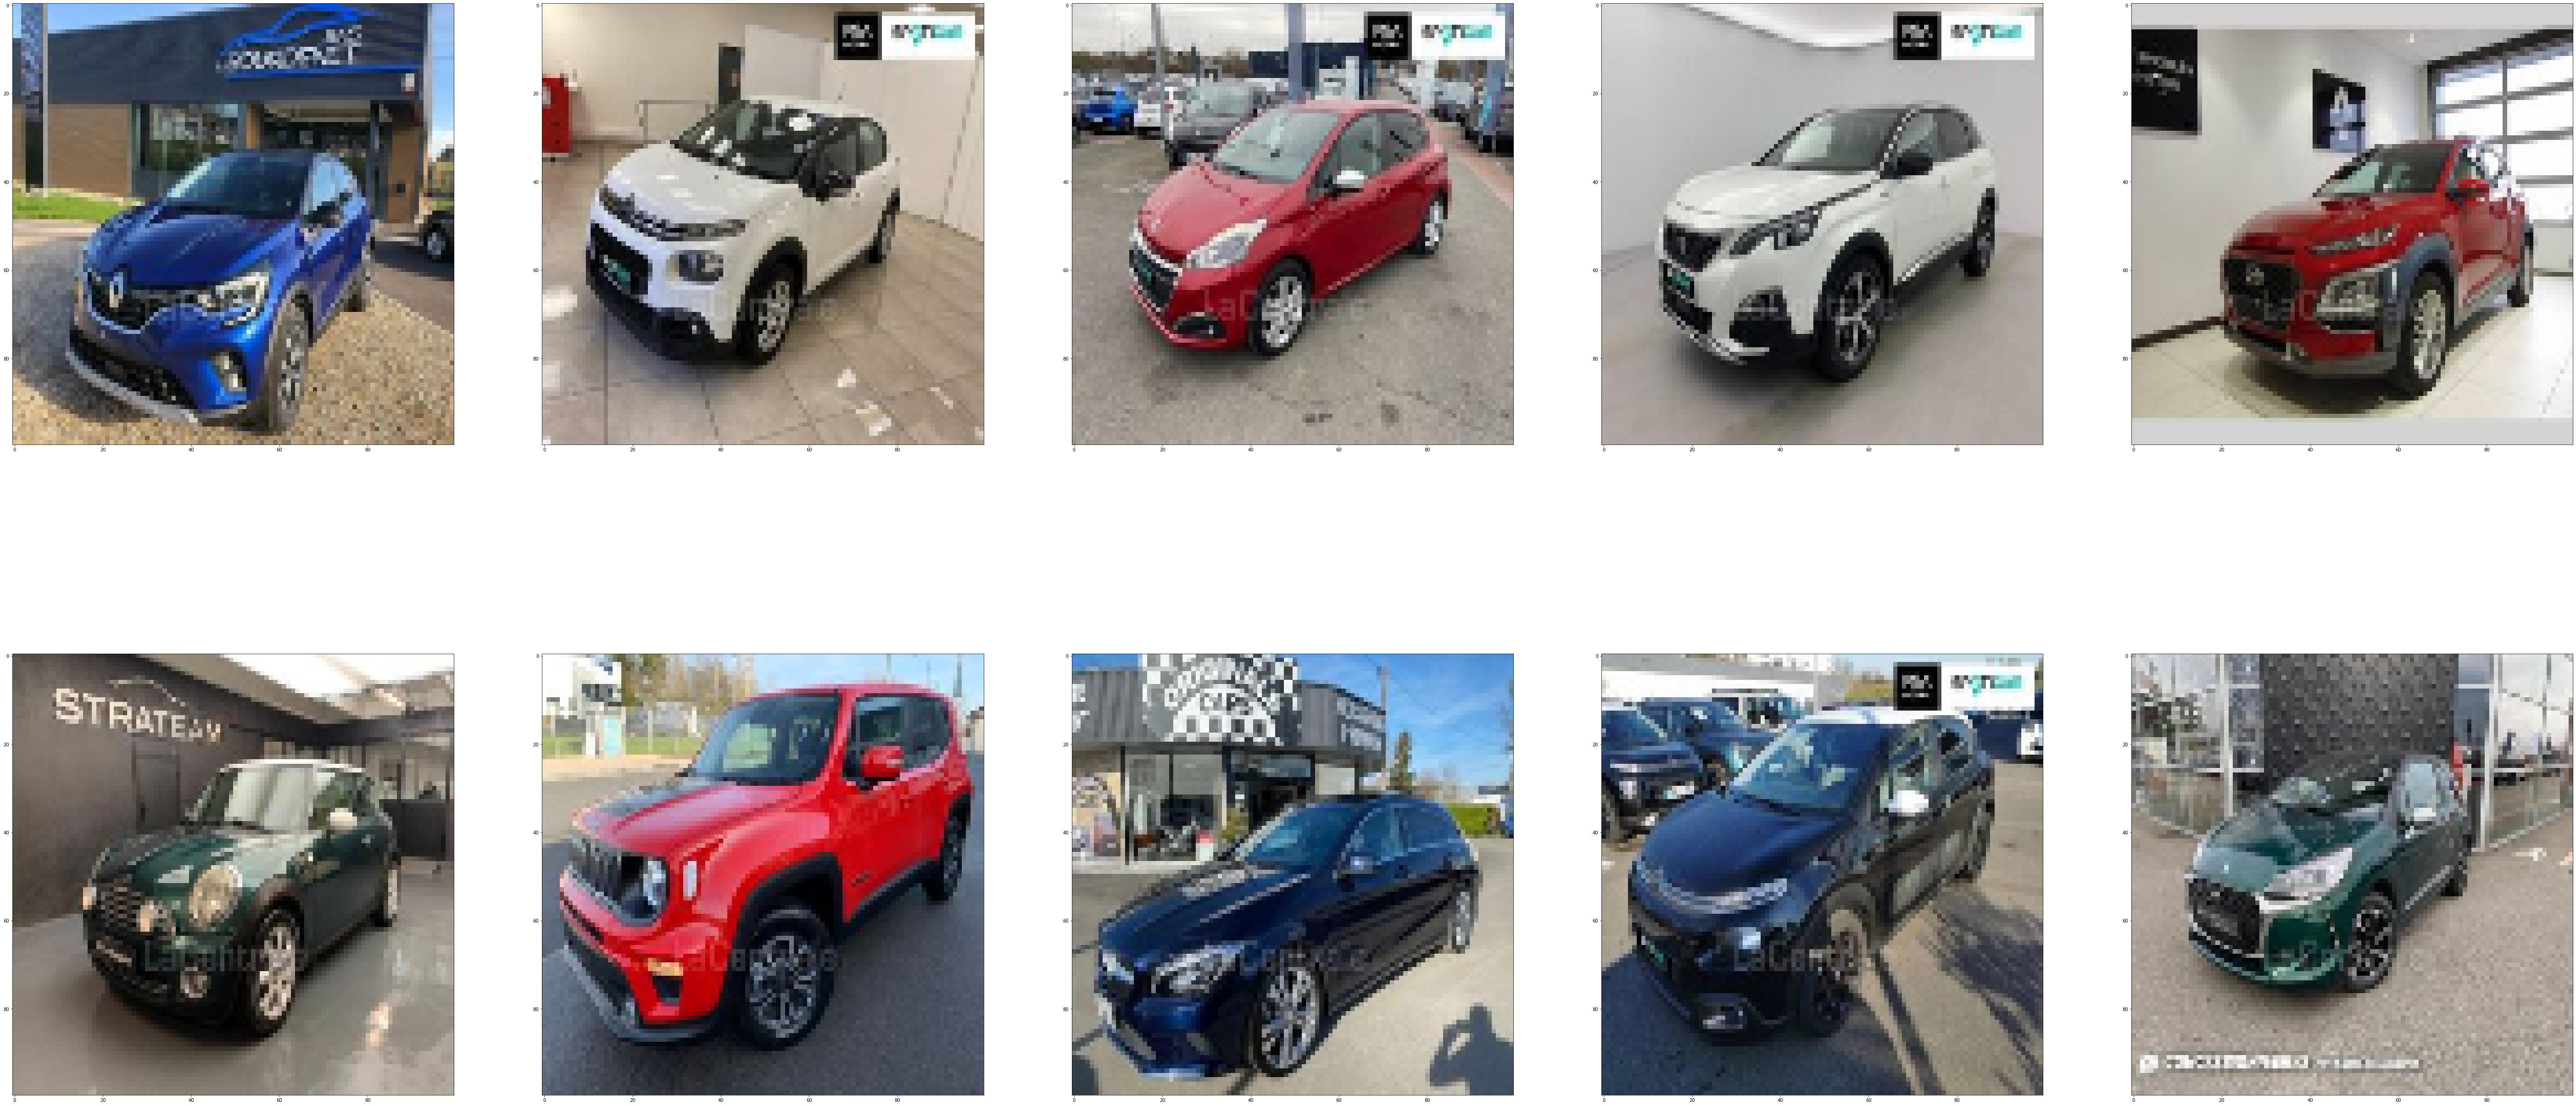

In [16]:
fig = plt.figure(figsize=(IMG_SIZE, IMG_SIZE))

for i,img in enumerate(X[:10]):
    fig.add_subplot(4,5, i+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
plt.show()

After separating the images and the indexes, from the training_data, we can observe the both of them have the same length, corresponding to the number of samples.

In [17]:
print("input shape: ", X.shape)

input shape:  (3038, 100, 100, 3)


In [18]:
print("output shape: ", y.shape)

output shape:  (3038,)


<font size='3'><b>3. Creating the training model</b></font>

In this section, we will create the neural network model for the color classification. In order to do that, we will import the module Tensorflow. We will also import the necessary modules for the creation of a neural network.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

We have our images data samples X and their classes y. In order to understand how well our model is doing with different samples different from the training samples, we split the data into training data and validation data. We split the data into 70% training data and 30% testing data.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   shuffle = True) 

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
print("training model input shape: ", X_train.shape, "\n")
print("testing model input shape: ", X_test.shape)

training model input shape:  (2126, 100, 100, 3) 

testing model input shape:  (912, 100, 100, 3)


In [23]:
print("training model input: ", X_train)

training model input:  [[[[0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   ...
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]]

  [[0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   ...
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]]

  [[0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   ...
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]]

  ...

  [[0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   ...
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]
   [0.82745098 0.82745098 0.82745098]]

  [[0.82745098 0.82745

In [24]:
y_train = to_categorical(y_train, len(CATEDIR))
y_test = to_categorical(y_test, len(CATEDIR))

In [25]:
print("training model output shape: ", y_train.shape, "\n")
print("testing model output shape: ", y_test.shape)

training model output shape:  (2126, 5) 

testing model output shape:  (912, 5)


In [26]:
print("training model output: ", y_train)

training model output:  [[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


Now, we want to create our training model, we decided to create a convolutional neural network model which is more adapted for image recognition. <br>
First, we add the input layer with the input_shape corresponding to the shape of the images, and we specify the layer activation rule. <br>
We add more convolutional layers with the activation relu, before flattening the model into a fully connected dense layer, and finally adding the output layer.<br>
We use the activation softmax for the output layer, adequate for a categorization problem.

In [27]:
model = Sequential()
# input layer
model.add(Conv2D(32, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), 
                 activation = "relu"))
# Convolutional Layer
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
# Dense Layer
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))

# Output Layer
model.add(Dense(len(CATEDIR), activation = "softmax"))

After adding the layers we compile them into our model, using the Adam optimization algorithm. As a classification problem, the loss function of the model can be obtained with the categorical_crossentropy.

In [28]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ["accuracy"])

Now our training model is created and can be used to train with the different image samples, we can see the structure of our model using the model.summary.

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

We fit our training data into our model, and begin the training. We specify the batch_size, corresponding to how many samples at a time are trained, then we specify the number of epochs, which is how much time the model are going to run throughout the sample, and we specify the validation data, to understand how our model fare with image different from the training image samples.

In [30]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, 
          validation_data = (X_test, y_test))

Epoch 1/10
34/34 [==============================] - 9s 243ms/step - loss: 1.4303 - accuracy: 0.3326 - val_loss: 1.1003 - val_accuracy: 0.4375
Epoch 2/10
34/34 [==============================] - 8s 227ms/step - loss: 1.0620 - accuracy: 0.5066 - val_loss: 0.8415 - val_accuracy: 0.6031
Epoch 3/10
34/34 [==============================] - 8s 228ms/step - loss: 0.7848 - accuracy: 0.6651 - val_loss: 0.6498 - val_accuracy: 0.7292
Epoch 4/10
34/34 [==============================] - 8s 232ms/step - loss: 0.6080 - accuracy: 0.7475 - val_loss: 0.5484 - val_accuracy: 0.7686
Epoch 5/10
34/34 [==============================] - 8s 227ms/step - loss: 0.5461 - accuracy: 0.7787 - val_loss: 0.4813 - val_accuracy: 0.8158
Epoch 6/10
34/34 [==============================] - 8s 231ms/step - loss: 0.4342 - accuracy: 0.8245 - val_loss: 0.5366 - val_accuracy: 0.7982
Epoch 7/10
34/34 [==============================] - 8s 228ms/step - loss: 0.4477 - accuracy: 0.8195 - val_loss: 0.4368 - val_accuracy: 0.8421
Epoch 

In order to have a better understanding of the result, we plot the evolution of the accuracy and loss of the training and validation, in function of the number of epochs.

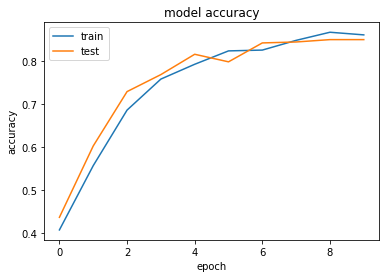

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

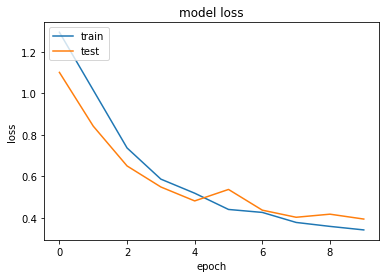

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

We can also understand the performance of our model by getting the mean squared error, and the R2 Score.

In [35]:
print("Mean Squared Error of Train:\t {:0.4f}" .format(mean_squared_error(y_train, y_train_pred)))
print("Mean Squared Error of Test:\t {:0.4f}" .format(mean_squared_error(y_test, y_test_pred)))

Mean Squared Error of Train:	 0.0339
Mean Squared Error of Test:	 0.0424


In [36]:
print("R2 score of Train:\t {:0.4f}" .format(r2_score(y_train, y_train_pred)))
print("R2 score of Test:\t {:0.4f}" .format(r2_score(y_test, y_test_pred)))

R2 score of Train:	 0.7809
R2 score of Test:	 0.7267


<b>Small conclusion:</b><br>
Considering our relatively small dataset compared to the likes of the CIFAR-10 dataset, our model has good performance. We have training and validation accuracy above 85%, the mean squared error are small and the R2 score are nearing 1, which are all good results.
However, we have a noticeable difference between the values of the Training data and Testing data, this can be due to a possibility of an overfitting, or imperfections in our dataset.

In [37]:
model.save("model_v1_1.h5")

<font size='3'><b>4. Image prediction</b></font>

We have created a model capable of predicting the color of a car, and we want to test the model using completely different images from the training or validation data. we don't give the model any indication of the color class, and let the model determine the color of the car in the image by itself.
We have random images of car inside the PREDDIr folder "PREDICT".

In [38]:
PREDDIR = "PREDICT"
CATEDIR = ["White","Red","Green","Blue","Black"]

In [39]:
prediction_data = []
IMG_SIZE = 100

for img in os.listdir(PREDDIR):
    img_array = cv2.imread(PREDDIR+"/"+img)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
    prediction_data.append(new_array)

We save these new images as our new input data for the model.

In [40]:
X_pred = np.array(prediction_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

We reload our saved model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model = load_model("model_v1_1.h5", compile = True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

We predict the classes of the new input images.

In [43]:
y_pred = model.predict(X_pred)

In order have a sense of how our model is doing, below are the images that we want to be classified.

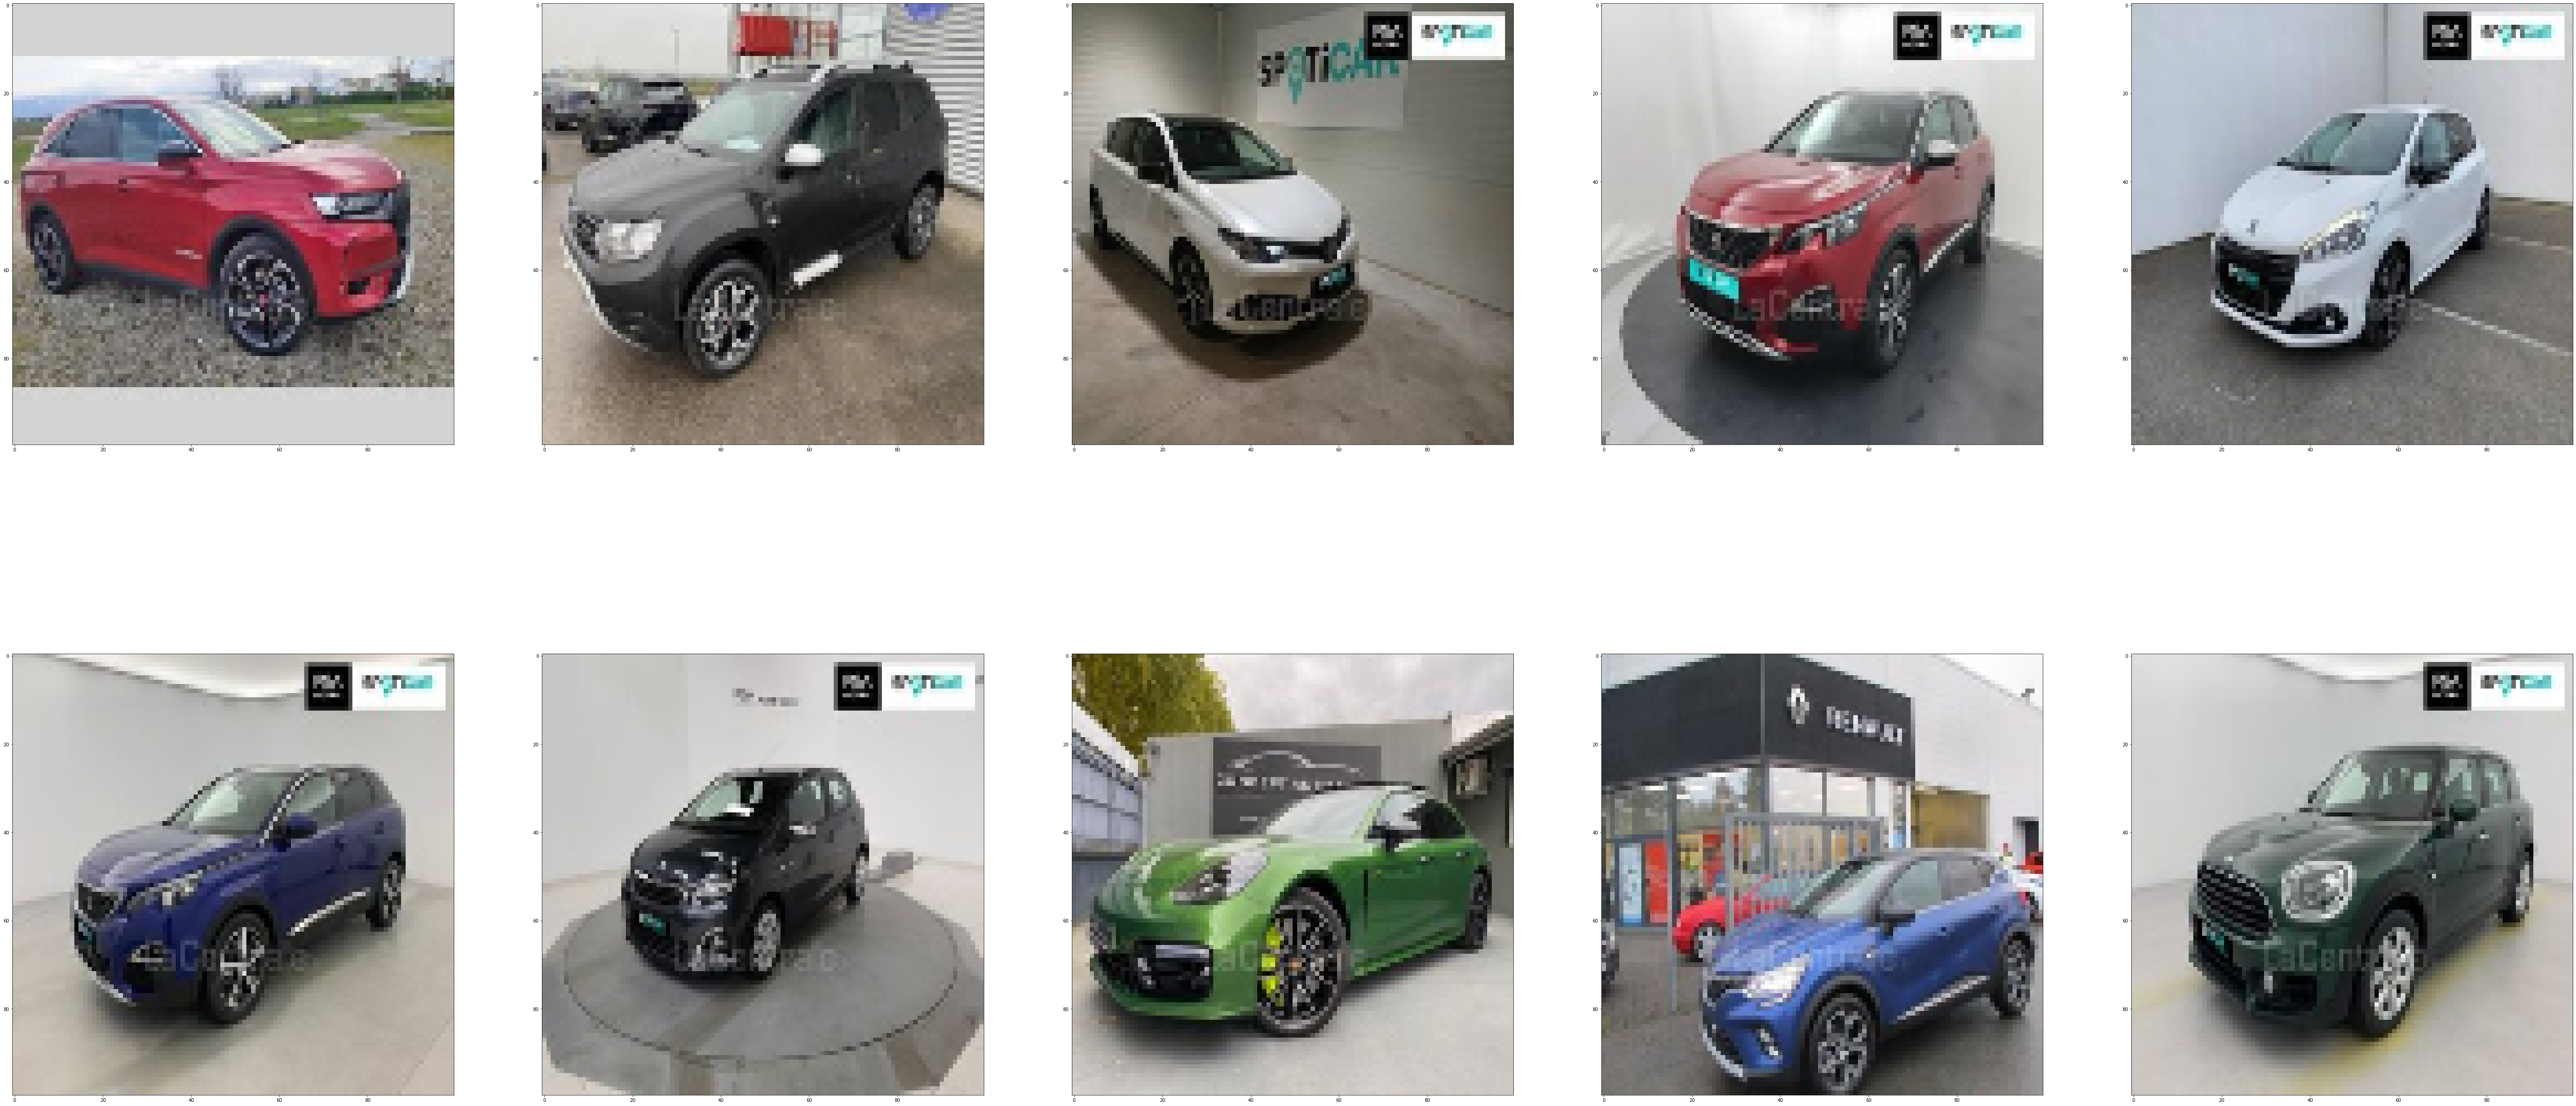

In [44]:
fig = plt.figure(figsize=(IMG_SIZE, IMG_SIZE))

for i,img in enumerate(X_pred):
    fig.add_subplot(4,5, i+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
plt.show()

And we have below, the prediction from our model.

In [45]:
for i in range(10):
    result = y_pred[i,:]
    print("image", i)
    for j in range(5):
        if result[j] == 1.0:
            print("color: ", CATEDIR[j], "\n")

image 0
color:  Red 

image 1
color:  Black 

image 2
color:  White 

image 3
color:  Red 

image 4
color:  White 

image 5
color:  Blue 

image 6
color:  Black 

image 7
color:  Green 

image 8
color:  Blue 

image 9
color:  Black 



<b>Small conclusion:</b><br>
We can observe our model is capable to classify the color of a car, which was our objective in this project. <br>
The prediction of our model isn't 100% accurate, but the result can be perfected by tunning our neural network model and tweaking with the training technique.